In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays

least eigenvalue = 1.4654943925052066e-14
cond(L + q * I) = 

115.5890205223516
cnd_number_no_lev[1] = 435.973753786361
cnd_number_no_lev[2] = 19.885412447133152


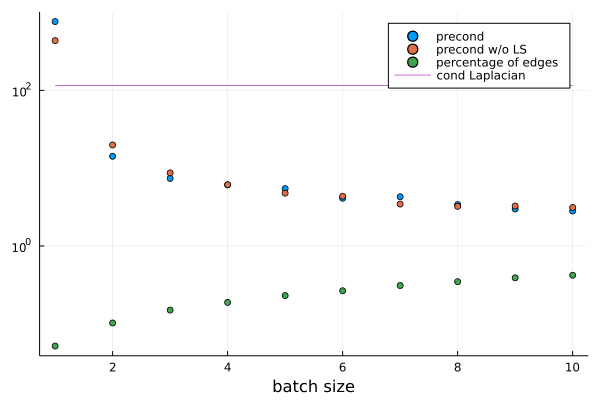

In [22]:
n = 50
p = 0.8
eta = 0.2
rng = Random.default_rng();

meta_g_ero = gen_graph_mun(rng, n, p, eta);
B = magnetic_incidence(meta_g_ero)
println("least eigenvalue = " ,minimum(eigvals(L)))

n = nv(meta_g_ero);
m = ne(meta_g_ero);

q = 0.0;
n_tot = 10;

B = magnetic_incidence(meta_g_ero)
Lap = B*B';

cnd_number = zeros(n_tot,1);
cnd_number_no_lev = zeros(n_tot,1);
sp_L = zeros(n_tot,1);
sp_L_nl = zeros(n_tot,1);
percent_edges = zeros(n_tot,1);


lev = leverage_score(B, q);

for i=1:n_tot
    avgL = average_sparsifier(rng, meta_g_ero, lev, q, i)
    avgL_no_lev = average_sparsifier(rng,meta_g_ero,nothing,q,i);
    avgL = (avgL + avgL')/2
    avgL_no_lev = (avgL_no_lev + avgL_no_lev')/2

    R = cholesky(avgL + q * I).L
    R_nl = cholesky(avgL_no_lev + q * I).L

    sp_L[i] = nnz(sparse(R))
    sp_L_nl[i] = nnz(sparse(R_nl))
    
    precond_L = R\((Lap + q * I)/R');
    precond_L_nl = R_nl\((Lap + q * I)/R_nl');

    cnd_number[i] = cond(precond_L);
    cnd_number_no_lev[i] = cond(precond_L_nl);
    percent_edges[i] = nb_of_edges(avgL)/m;
end
##

println("cond(L + q * I) = ", cond(Lap + q * I))
println("cnd_number_no_lev[1] = ",cnd_number_no_lev[1])
println("cnd_number_no_lev[2] = ",cnd_number_no_lev[2])

scatter(1:n_tot,cnd_number, yaxis=:log,xlabel = "batch size",labels = "precond")
scatter!(1:n_tot,cnd_number_no_lev, yaxis=:log,xlabel = "batch size",labels = "precond w/o LS")
scatter!(1:n_tot,percent_edges,labels = "percentage of edges")
plot!(1:n_tot,cond(Lap + q * I)*ones(n_tot,1),labels = "cond Laplacian")

In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays

n = 50
p = 0.8

rng = Random.default_rng()

mun = true

if mun
    eta = 0.
    meta_g_ero = gen_graph_mun(rng, n, p, eta)
    println("homemade ER")
else
    g_ero = Graphs.erdos_renyi(n, p);
    meta_g_ero = MetaGraph(g)
    for e in edges(meta_g_ero)
        set_prop!(meta_g_ero, e, :angle, 0.0)
    end

    println("Graphs.jl ER")
end

m = ne(meta_g_ero)
B = magnetic_incidence(meta_g_ero)
# exact Laplacian
Lap = B*B'

q = 0.01;
n_tot = 10;

mtsf = multi_type_spanning_forest(rng, meta_g_ero, q)
D = props(mtsf)
w = D[:weight]
sparseB = magnetic_incidence(mtsf)
ind_e = mtsf_edge_indices(mtsf, meta_g_ero)
nb_e = length(ind_e)
W = I / (nb_e / m)

println("using magnetic_incidence")
sparseL =  w * sparseB * W * sparseB';
precond_L = inv(sparseL + q * I)*(Lap + q * I);
println(cond(precond_L))

println("magnetic_incidence by hand")
sparseL = w * B[:,ind_e] * W * B[:,ind_e]'
precond_L = inv(sparseL + q * I)*(Lap + q * I);
println(cond(precond_L))

homemade ER


using magnetic_incidence


531.3011197444459
magnetic_incidence by hand
531.3011197444459


cond(L + q * I) = 52.09038764508658
cnd_number_no_lev[1] = 143.26533711675899
cnd_number_no_lev[2] = 17.78559342896578


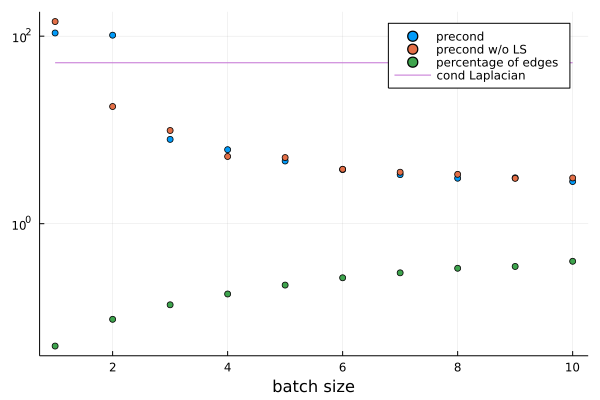

In [17]:
n = 50
p = 0.8
g_ero = Graphs.erdos_renyi(n, p);

meta_g_ero_base = MetaGraph(g_ero)
for e in edges(meta_g_ero_base)
    set_prop!(meta_g_ero_base, e, :angle, 0.0)
end
B = magnetic_incidence(meta_g_ero_base)


n = nv(meta_g_ero_base);
m = ne(meta_g_ero_base);


q = 0.9;
n_tot = 10;

##

cnd_number = zeros(n_tot,1);
cnd_number_no_lev = zeros(n_tot,1);
sp_L = zeros(n_tot,1);
sp_L_nl = zeros(n_tot,1);
percent_edges = zeros(n_tot,1);


Lap = B*B';
lev = leverage_score(B, q);
rng = Random.default_rng();

for i=1:n_tot
    avgL = average_sparsifier(rng, meta_g_ero_base, lev, q, i)
    avgL_no_lev = average_sparsifier(rng,meta_g_ero_base,nothing,q,i);
    avgL = (avgL + avgL')/2
    avgL_no_lev = (avgL_no_lev + avgL_no_lev')/2

    R = cholesky(avgL + q * I).L
    R_nl = cholesky(avgL_no_lev + q * I).L

    sp_L[i] = nnz(sparse(R))
    sp_L_nl[i] = nnz(sparse(R_nl))

    precond_L = R\((Lap + q * I)/R');
    precond_L_nl = R_nl\((Lap + q * I)/R_nl');

    cnd_number[i] = cond(precond_L);
    cnd_number_no_lev[i] = cond(precond_L_nl);
    percent_edges[i] = nb_of_edges(avgL)/m;
end
##


println("cond(L + q * I) = ", cond(Lap + q * I))
println("cnd_number_no_lev[1] = ",cnd_number_no_lev[1])
println("cnd_number_no_lev[2] = ",cnd_number_no_lev[2])

scatter(1:n_tot,cnd_number, yaxis=:log,xlabel = "batch size",labels = "precond")
scatter!(1:n_tot,cnd_number_no_lev, yaxis=:log,xlabel = "batch size",labels = "precond w/o LS")
scatter!(1:n_tot,percent_edges,labels = "percentage of edges")
plot!(1:n_tot,cond(Lap + q * I)*ones(n_tot,1),labels = "cond Laplacian")

cond(L + q * I) = 98.42853992753513
cnd_number_no_lev[1] = 107.26532372300731
cnd_number_no_lev[2] = 16.22838981073132


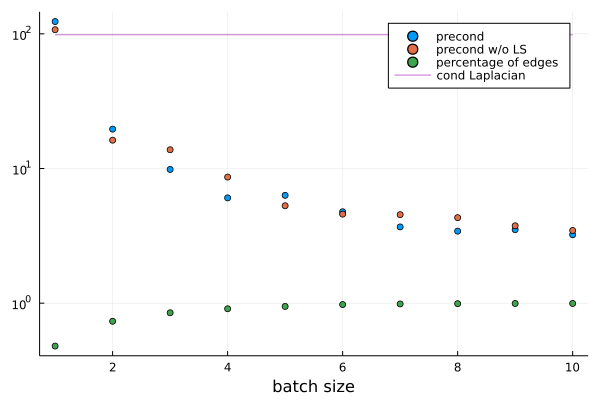

In [18]:
n = 500 
k = 4
β = 0.3
g = watts_strogatz(n, k, β)

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end
B = magnetic_incidence(meta_g)

n = nv(meta_g);
m = ne(meta_g);

q = 0.1;
n_tot = 10;

cnd_number = zeros(n_tot,1);
cnd_number_no_lev = zeros(n_tot,1);
sp_L = zeros(n_tot,1);
sp_L_nl = zeros(n_tot,1);
percent_edges = zeros(n_tot,1);

Lap = B*B';
lev = leverage_score(B, q);
rng = Random.default_rng();

for i=1:n_tot
    avgL = average_sparsifier(rng, meta_g, lev, q, i)
    avgL_no_lev = average_sparsifier(rng,meta_g,nothing,q,i);
    avgL = (avgL + avgL')/2
    avgL_no_lev = (avgL_no_lev + avgL_no_lev')/2

    R = cholesky(avgL + q * I).L
    R_nl = cholesky(avgL_no_lev + q * I).L

    sp_L[i] = nnz(sparse(R))
    sp_L_nl[i] = nnz(sparse(R_nl))

    precond_L = R\((Lap + q * I)/R');
    precond_L_nl = R_nl\((Lap + q * I)/R_nl');

    cnd_number[i] = cond(precond_L);
    cnd_number_no_lev[i] = cond(precond_L_nl);
    percent_edges[i] = nb_of_edges(avgL)/m;
end
#
println("cond(L + q * I) = ", cond(Lap + q * I))
println("cnd_number_no_lev[1] = ",cnd_number_no_lev[1])
println("cnd_number_no_lev[2] = ",cnd_number_no_lev[2])

scatter(1:n_tot,cnd_number, yaxis=:log,xlabel = "batch size",labels = "precond")
scatter!(1:n_tot,cnd_number_no_lev, yaxis=:log,xlabel = "batch size",labels = "precond w/o LS")
scatter!(1:n_tot,percent_edges,labels = "percentage of edges")
plot!(1:n_tot,cond(Lap + q * I)*ones(n_tot,1),labels = "cond Laplacian")

cond(L + q * I) = 79253.19789010138
cnd_number_no_lev[1] = 4235.801484169221
cnd_number_no_lev[2] = 20.618301613400316


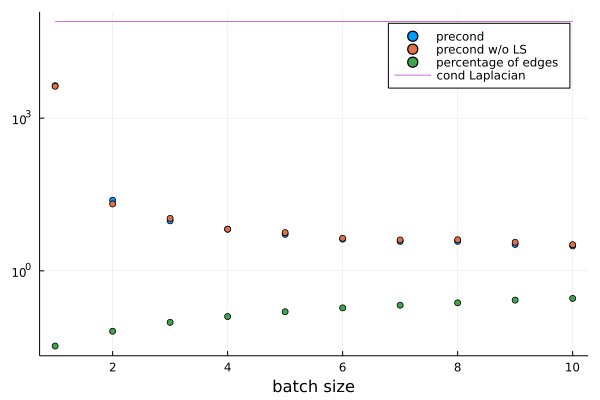

In [27]:
c = [50 10;
2 50]
n = [100 ; 100]
g =  stochastic_block_model(c, n)


meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end
B = magnetic_incidence(meta_g)

n = nv(meta_g);
m = ne(meta_g);

q = 0.001;
n_tot = 10;

cnd_number = zeros(n_tot,1);
cnd_number_no_lev = zeros(n_tot,1);
sp_L = zeros(n_tot,1);
sp_L_nl = zeros(n_tot,1);
percent_edges = zeros(n_tot,1);

Lap = B*B';
lev = leverage_score(B, q);
rng = Random.default_rng();

for i=1:n_tot
    avgL = average_sparsifier(rng, meta_g, lev, q, i)
    avgL_no_lev = average_sparsifier(rng,meta_g,nothing,q,i);
    avgL = (avgL + avgL')/2
    avgL_no_lev = (avgL_no_lev + avgL_no_lev')/2

    R = cholesky(avgL + q * I).L
    R_nl = cholesky(avgL_no_lev + q * I).L

    sp_L[i] = nnz(sparse(R))
    sp_L_nl[i] = nnz(sparse(R_nl))

    precond_L = R\((Lap + q * I)/R');
    precond_L_nl = R_nl\((Lap + q * I)/R_nl');

    cnd_number[i] = cond(precond_L);
    cnd_number_no_lev[i] = cond(precond_L_nl);
    percent_edges[i] = nb_of_edges(avgL)/m;
end
#
println("cond(L + q * I) = ", cond(Lap + q * I))
println("cnd_number_no_lev[1] = ",cnd_number_no_lev[1])
println("cnd_number_no_lev[2] = ",cnd_number_no_lev[2])

scatter(1:n_tot,cnd_number, yaxis=:log,xlabel = "batch size",labels = "precond")
scatter!(1:n_tot,cnd_number_no_lev, yaxis=:log,xlabel = "batch size",labels = "precond w/o LS")
scatter!(1:n_tot,percent_edges,labels = "percentage of edges")
plot!(1:n_tot,cond(Lap + q * I)*ones(n_tot,1),labels = "cond Laplacian")


In [2]:
n = 50
p = 0.8
eta = 0.2
rng = Random.default_rng();

meta_g_ero = gen_graph_mun(rng, n, p, eta);